<a href="https://colab.research.google.com/github/seokhee516/ML-DL-playground/blob/main/_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망(Convolutional Neural Networks, CNNs)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,  
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>


## 완전연결계층과의 차이
- 완전연결계층(Fully-Connected Layer)은 이미지와 같은 데이터의 형상(3차원)을 무시함  

- 모든 입력데이터를 동등하게 취급  
  즉, **데이터의 특징을 잃어버리게 됨**

- 컨볼루션층(convolution layer)은 <u>**이미지 픽셀 사이의 관계를 고려**</u>

- 완전연결계층은 공간정보를 손실하지만, 컨볼루션층은 공간정보를 유지  
  - 이미지와 같은 2차원(흑백) 또는 3차원(컬러)의 형상을 유지

  - 공간정보를 유지하기 때문에 완전연결계층에 비해 적은 수의 파라미터를 요구


## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.net/software/theano_versions/dev/_images/numerical_no_padding_no_strides.gif">

  <sub>출처: http://deeplearning.net/software/theano_versions/dev/tutorial/conv_arithmetic.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/arbitrary_padding_no_strides.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="http://deeplearning.net/software/theano_versions/dev/_images/no_padding_strides.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의) 
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

### 평균 풀링(Avg Pooling)

- 필터 내의 있는 픽셀값의 평균을 구하는 과정

- 과거에 많이 사용, 요즘은 잘 사용되지 않는다.

- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해  
  특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">

  <sub>출처: https://www.researchgate.net/figure/Average-pooling-example_fig21_329885401</sub>

## 합성곱 연산의 의미

## 2차원 이미지에 대한 필터 연산 예시
  - 가장 자리 검출(Edge-Detection)

  - 소벨 필터(Sobel Filter)

    - Horizontal : 가로 방향의 미분을 구하는 필터 역할

    - Vertical : 세로 방향의 미분을 구하는 필터 역할  

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_ZRkuiCkv0ZEHFiyCp-7Y5bCL0liaYSQ4mg&usqp=CAU" width="350">

  <sub>출처: https://www.cloras.com/blog/image-recognition/</sub>


### modules import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO


### util functions

In [11]:
def url_to_image(url, gray=False):
  resp = urllib.request.urlopen(url)
  image = np.asarray(bytearray(resp.read()), dtype="uint8")
  
  if gray == True:
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
  else:
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  
  return image

def filtered_image(image, filter, output_size):
  filtered_img = np.zeros((output_size, output_size))
  filter_size = filter.shape[0]

  for i in range(output_size):
    for j in range(output_size):
      multyply_values = image[i:(i+filter_size), j:(j+filter_size)] * filter
      sum_value = np.sum(multyply_values)

      if (sum_value > 255):
        sum_value = 255
      filtered_img[i, j] = sum_value

  return filtered_img

### 이미지 확인
- 예시이므로 정사각형 사이즈로 진행

image.shape (440, 440)


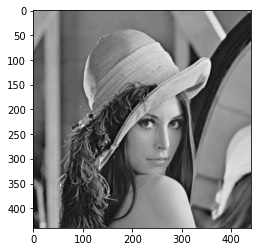

In [6]:
img_url = "http://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image = url_to_image(img_url, gray=True)
print("image.shape", image.shape)

plt.imshow(image, cmap='gray')
plt.show()

### 필터연산 적용

output size: 438


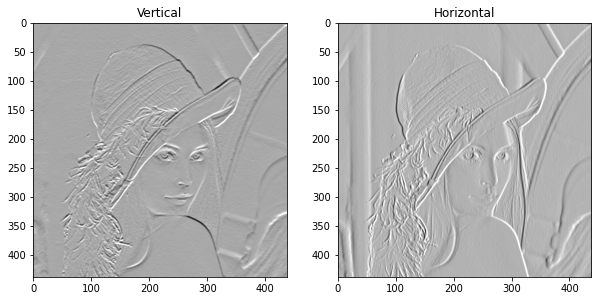

In [12]:
vertical_filter = np.array([[1., 2., 1.], 
                            [0., 0., 0.],
                            [-1., -2., -1.]])
horizontal_filter = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

output_size = int((image.shape[0] - 3) / 1 + 1)
print("output size:", output_size)

vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title("Vertical")
plt.imshow(vertical_filtered, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Horizontal")
plt.imshow(horizontal_filtered, cmap='gray')


### 이미지 필터를 적용한 최종 결과

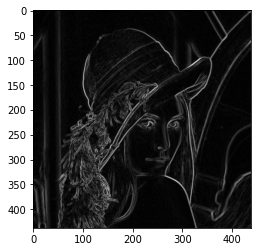

In [13]:
sobel_img = np.sqrt(np.square(horizontal_filtered) + np.square(vertical_filtered))

plt.imshow(sobel_img, cmap='gray');

## 3차원 데이터의 합성곱 연산
- **이미지는 3차원으로 구성**
  - (가로, 세로, 채널 수)
  - 채널 : RGB 

- 색상값의 정도에 따라 color색 결정

  <img src="https://www.projectorcentral.com/images/articles/RGB-Explained-600.jpg">

  <sub>출처: https://www.projectorcentral.com/All-About-Bit-Depth.htm?page=What-Bit-Depth-Looks-Like</sub>

### 아래의 이미지 확인은 참고사항

image.shape (440, 440, 3)


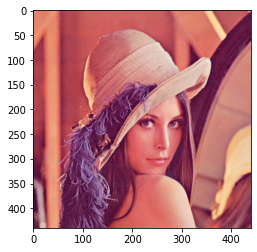

In [24]:
img_url = "http://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png"

image = url_to_image(img_url)
print("image.shape", image.shape)

plt.imshow(image)
plt.show()

In [25]:
image_copy = image.copy()
image_copy[:, :, 1] = 0
image_copy[:, :, 2] = 0
image_red = image_copy

In [26]:
print(image_red)

[[[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [232   0   0]
  [223   0   0]
  [201   0   0]]

 ...

 [[ 84   0   0]
  [ 86   0   0]
  [ 93   0   0]
  ...
  [174   0   0]
  [169   0   0]
  [172   0   0]]

 [[ 82   0   0]
  [ 86   0   0]
  [ 95   0   0]
  ...
  [177   0   0]
  [178   0   0]
  [183   0   0]]

 [[ 81   0   0]
  [ 86   0   0]
  [ 96   0   0]
  ...
  [178   0   0]
  [181   0   0]
  [185   0   0]]]


In [27]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 2] = 0
image_green = image_copy

In [20]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 1] = 0
image_blue = image_copy

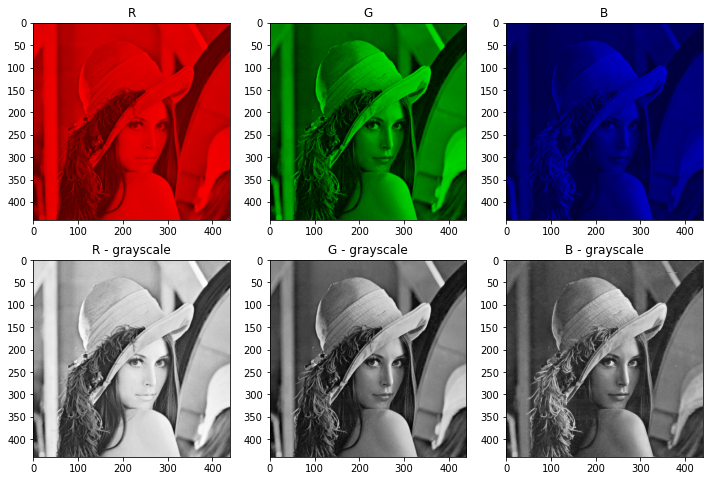

In [30]:
fig = plt.figure(figsize=(12, 8))
title_list = ['R', 'G', 'B',
              'R - grayscale', 'G - grayscale', 'B - grayscale']
image_list = [image_red, image_green, image_blue,
              image_red[:, :, 0], image_green[:, :, 1], image_blue[:, :, 2]]
for i, image in enumerate(image_list):
  ax = fig.add_subplot(2,3,i+1)
  ax.title.set_text("{}".format(title_list[i]))

  if i >=3:
    plt.imshow(image, cmap = 'gray')
  else:
    plt.imshow(image)

plt.show()

### 연산 과정

- 각 채널마다 컨볼루션 연산을 적용
  - 3채널을 모두 합쳐서 '하나의 필터'라고 칭함  
    
  <img src="https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="600">

<br>

- 각각의 결과를 더함  
  
  <img src="https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="600">

<br>

- 더한 결과에 편향을 더함  
  <img src="https://miro.medium.com/max/588/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="300">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>



### modules import

### util functions

### 이미지 확인

### 필터연산 적용
- 3x3 크기의 3채널 필터 5개

- (5, 3, 3, 3) ----> (5개, 3채널, 세로, 가로)

### 필터연산을 적용한 최종 결과

### 전체 과정 한번에 보기

# 합성곱 신경망 구현
- 참고: 밑바닥부터 시작하는 딥러닝1

## 합성곱 층(Convolution Layer)

### 컨볼루션 레이어 테스트

### 동일한 이미지 여러 장 테스트 (배치 처리)

### 동일한 이미지 배치처리(color)

## 풀링 층(Pooling Layer)

### 풀링 레이어 테스트
- 2차원 이미지
  - (Height, Width, 1)

### 동일한 이미지 배치처리
- Color Image

- conv --> maxpooling --> conv --> maxpooling

- 시각화 과정
  - 5번째 이미지
  - [2, 5, 9] 필터를 통해 확인

# 대표적인 CNN 모델 소개

## LeNet - 5

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## AlexNet

- 활성화 함수로 **ReLU** 사용

- 국소적 정규화(Local Response normalization, LRN) 실시하는 계층 사용

- 드롭아웃

  <img src="https://miro.medium.com/proxy/1*qyc21qM0oxWEuRaj-XJKcw.png" width="800">

  <center>[AlexNet 구조]</center>

  <sub>출처: http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf</sub>

## VGG - 16

- 모든 컨볼루션 레이어에서의 필터(커널) 사이즈를 **3x3**으로 설정

- 2x2 MaxPooling

- 필터의 개수는 Conv Block을 지나가면서 2배씩 증가  
  32 -> 64 -> 128

  <br>

  <img src="https://www.researchgate.net/profile/Jose_Cano31/publication/327070011/figure/fig1/AS:660549306159105@1534498635256/VGG-16-neural-network-architecture.png" width="800">

  <center>[VGG-16 구조]</center>

  <sub>출처: Very Deep Convolutional Networks for Large-Scale Image Recognition</sub>

# CNN 학습 구현 - MNIST

## modules import

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


## Util Functions

## Util Classes

## 데이터 로드

## Bulid Model

## Hyper Parameters

In [ ]:
epochs = 10
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.001
current_iter = 0

iter_per_epoch = max

## 모델 생성 및 학습

### 생각보다 학습이 잘 되지 않았던 이유
- 학습 데이터의 수 부족
  - 학습 시간고려

- FC Layer의 노드수가 적절했는지

- 학습률(learning rate)값이 적절했는지

- ...

## 어떠한 조건에서 가장 좋은 결과를 내는지는 값을 **적절히** 바꾸어 시도해보아야함